# Exploration and Exploitation

In [ ]:
Pkg.add("PGFPlots")

In [1]:
using PGFPlots
using Interact
using Reactive
using Distributions
include("helpers.jl")
include("bandits.jl");

## Multi-Armed Bandit Problems

In [2]:
srand(2)
arms = 3
b = Bandit(arms)
banditTrial(b)

Interact.Button{Void}(1: "input" = nothing Void ,"Arm 1",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Button{Void}(5: "input-2" = nothing Void ,"Arm 2",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Button{Void}(9: "input-3" = nothing Void ,"Arm 3",nothing)

"0 wins out of 0 tries (NaN percent)"

Interact.Options{:ToggleButtons,String}(13: "input-4" = Hide String ,"True Params","Hide","Hide",Interact.OptionDict(DataStructures.OrderedDict("Hide"=>"Hide","Show"=>"Show"),Dict("Hide"=>"Hide","Show"=>"Show")),Any[],Any[],true,"horizontal")

""

## Bayesian Model Estimation

In [ ]:
srand(3)
arms = 2
b = Bandit(arms)
banditEstimation(b)

## Ad Hoc Exploration Strategies

In [4]:
# Select random action with probability eps, otherwise greedy
type EpsGreedy <: BanditPolicy
    eps::Real 
end
function arm(b::EpsGreedy, s::BanditStatistics)
    if rand() < b.eps
        D = DiscreteUniform(1, numArms(s))
        return rand(D)
    else
        return indmax(winProbabilities(s))
    end
end;

In [5]:
# Select arm with probability proportional to exp(precision*winprobability)
type SoftMax <: BanditPolicy
    precision::Real 
end
function arm(b::SoftMax, s::BanditStatistics)
    p = exp(b.precision * winProbabilities(s))
    p = p / sum(p)
    D = Categorical(p)
    return rand(D)
end;

In [6]:
# Select arm with highest alpha upper confidence bound
type IntervalExploration <: BanditPolicy
    alpha::Real
end
function arm(b::IntervalExploration, s::BanditStatistics)
    i = indmax([quantile(Beta(s.numWins[i] + 1, s.numTries[i] - s.numWins[i] + 1), b.alpha) for i in 1:length(s.numWins)]) 
end;

Interact.Options{:SelectionSlider,Float64}(31: "input-8" = 0.5 Float64 ,"epsgreedy",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…),Dict(0.6=>"0.6",0.3=>"0.3",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(33: "input-9" = 20 Int64 ,"softmax",20,"20",Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"2"=>2,"4"=>4,"6"=>6,"8"=>8,"10"=>10,"12"=>12,"14"=>14,"16"=>16,"18"=>18…),Dict(30=>"30",32=>"32",2=>"2",40=>"40",16=>"16",0=>"0",26=>"26",10=>"10",34=>"34",8=>"8"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(35: "input-10" = 0.75 Float64 ,"interval",0.75,"0.75",Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.55"=>0.55,"0.6"=>0.6,"0.65"=>0.65,"0.7"=>0.7,"0.75"=>0.75,"0.8"=>0.8,"0.85"=>0.85,"0.9"=>0.9,"0.95"=>0.95…),Dict(0.6=>"0.6",0.95=>"0.95",0.7=>"0.7",0.85=>"0.85",0.9=>"0.9",0.65=>"0.65",0.8=>"0.8",0.5=>"0.5",0.55=>"0.55",0.75=>"0.75"…)),Any[],Any[],true,"horizontal")

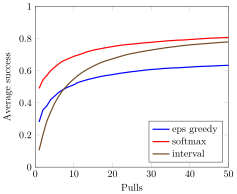

In [7]:
steps = 50
iterations = 1000
bandit = Bandit(collect(0.1:0.2:1))
# bandit = Bandit(collect(1:-0.2:0.1))
epsgreedy = 0.1
softmax = 2
interval = 0.05
@manipulate for epsgreedy in 0:0.1:1, softmax in 0:2:40, interval in 0.5:0.05:1
    epsGreedyResults = simulateAverage(bandit, EpsGreedy(epsgreedy), steps=steps, iterations = iterations)./collect(1:steps)
    softMaxResults = simulateAverage(bandit, SoftMax(softmax), steps=steps, iterations = iterations)./collect(1:steps)
    intervalResults = simulateAverage(bandit, IntervalExploration(interval), steps=steps, iterations = iterations)./collect(1:steps)
    Axis([
        Plots.Linear(epsGreedyResults, legendentry="eps greedy", style="very thick", mark="none"),
        Plots.Linear(softMaxResults, legendentry="softmax", style="very thick", mark="none"),  
        Plots.Linear(intervalResults, legendentry="interval", style="very thick", mark="none")  
        ], style="legend pos=south east", ymin=0, ymax=1, xmin=0, xmax=steps, xlabel="Pulls", ylabel="Average success")
end